In [283]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
from os import cpu_count

def diffuse(u, dt, dx2, D):
  alpha = D * dt/dx2
  return u + alpha * (np.roll(u, +1) + np.roll(u, -1) - 2*u)

def diffuse_slow(u, dt, dx2, D, q=1):
  alpha = D * dt/dx2
  un  = u.copy()
  cell_l = 25
  nCells = int(len(u)/cell_l)
  borders = [i*cell_l for i in range(nCells)]
  for i in range(1, len(u)-1):
      if i in borders or i+1 in borders:
          if i in borders:
              un[i] = u[i] + (alpha * (u[i+1] - u[i])) + (q *alpha * (u[i-1] - u[i]))
          else:
              un[i] = u[i] + (q * alpha * (u[i+1] - u[i])) + (alpha * (u[i-1] - u[i]))
      else:
          un[i] = u[i] + alpha * (u[i+1] + u[i-1] - u[i]*2)
  return un

DQs = [(d, q) for d in [300] for q in [1, 0.01, 0.001]]#, 0.9,  0.5, 0.2,0.1, 0.01 ] ]


def run_samples(d,q):
  dt = 1/1000
  dx2 = 1**2
  u = np.zeros(int(7*25))
  #u[len(u)//2:(len(u)//2)+5] = 1
  u[(len(u)//2)-5:(len(u)//2)+5] = 1
  vals = [u]
  for i in range(int(1/dt * 60)):
      vals.append(diffuse_slow(vals[-1], dt, dx2, d, q=q ))
  return vals

res = {}
for d,_ in DQs:
    res[d] = {}

import time


for d,q in DQs:
    t=time.time()
    res[d][q] = run_samples(d,q)
    print(time.time()-t)
 

10.630605697631836


10.324930906295776


10.362649917602539


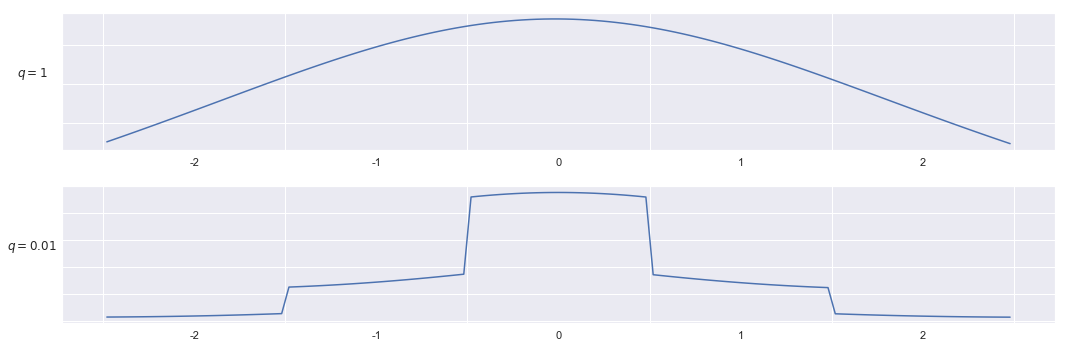

In [315]:
import seaborn as sns 
sns.set()

fig, axes = plt.subplots(2,1, figsize=(15, 5))

axes =np.array(axes).ravel()
pos = np.arange(-0, 25*5, step=25)+12
tpos = np.arange(-25, 25*5, step=25)+12
lbls = np.arange(-2, 4, 1)

ax = iter(axes)
for i in [1, 0.01]:
    a = next(ax)
    a.plot(res[300][i][3000][25:-25])
    a.set_xticklabels('')
    a.set_ylabel(fr"$q={i}$", rotation=0, labelpad=20)
    a.set_xticks(pos, minor=True)
    a.set_xticklabels(lbls, minor=True)
    a.set_xticks(tpos+12.5)
    a.set_yticklabels([])
    #a.set_xlim(0,120)
    #a.grid(False)
    

fig.tight_layout()
fig.savefig("Waterfall.png", dpi=400)